In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv("amazon_delivery.csv")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
from scipy.stats import stats
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [6]:
df["Weather"].fillna(df["Weather"].mode()[0],inplace=True)
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather             0
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [7]:
df["Agent_Rating"].fillna(df["Agent_Rating"].median(),inplace=True)
# null values are treated 

<Axes: ylabel='Density'>

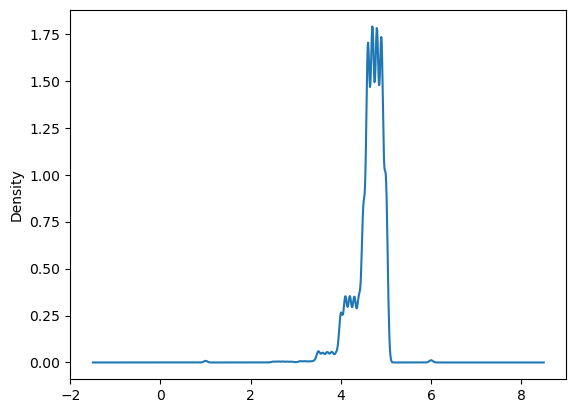

In [8]:
df["Agent_Rating"].plot(kind="kde")

<Axes: xlabel='Agent_Rating'>

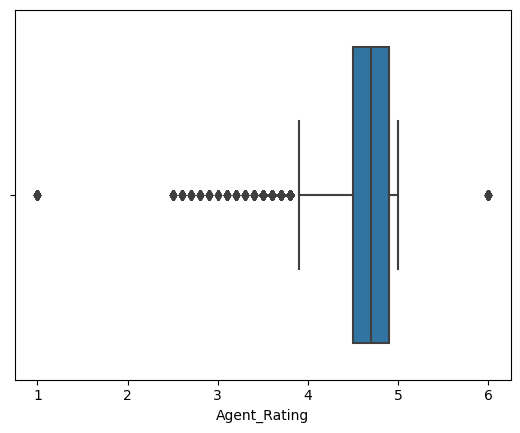

In [9]:
sns.boxplot(x=df["Agent_Rating"])

(array([1, 2, 3]),
 [Text(1, 0, 'Agent_rating_capping'),
  Text(2, 0, 'Agent_rating_mean_imputation'),
  Text(3, 0, 'Agent_rating_mean_addsub')])

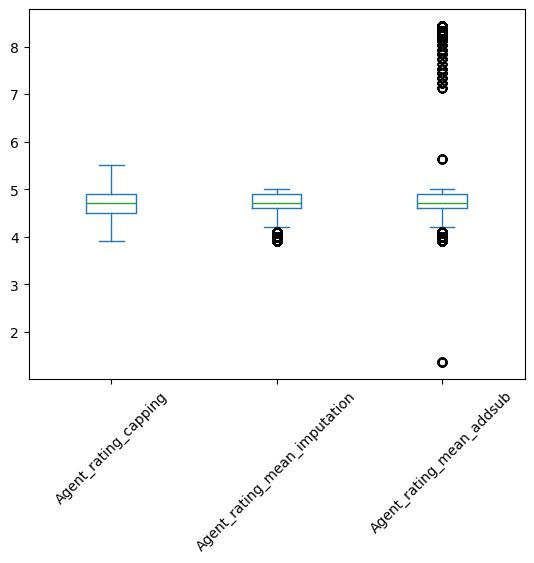

In [10]:
# outlier treatment
# capping
#Mean imputation
# Mean addition and subtraction
q3=df["Agent_Rating"].quantile(0.75)
q1=df["Agent_Rating"].quantile(0.25)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df["Agent_rating_capping"]=df["Agent_Rating"].apply(lambda x:ll if x<ll else ul if x>ul else x)
df["Agent_rating_mean_imputation"]=df["Agent_Rating"].apply(lambda x: df["Agent_Rating"].mean() if x<ll else df["Agent_Rating"].mean() if x>ul else x)
df["Agent_rating_mean_addsub"]=df["Agent_Rating"].apply(lambda x: x+df["Agent_Rating"].mean() if x<ll else x-df["Agent_Rating"].mean() if x>ul else x)
df[["Agent_rating_capping","Agent_rating_mean_imputation","Agent_rating_mean_addsub"]].plot(kind="box")
plt.xticks(rotation=45)

<Axes: ylabel='Density'>

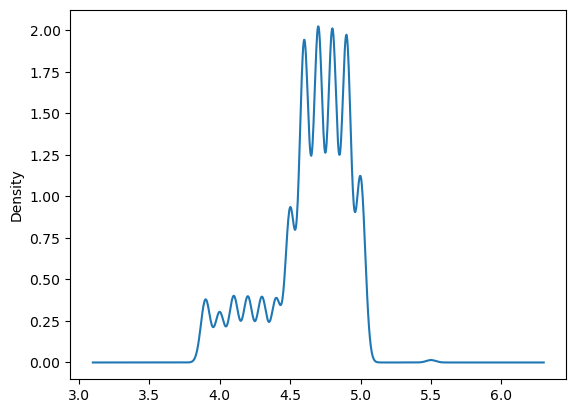

In [11]:
# so we consider capping to treat the outliers
df["Agent_rating_capping"].plot(kind="kde")

In [12]:
df.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Agent_rating_capping,Agent_rating_mean_imputation,Agent_rating_mean_addsub
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,4.9,4.9,4.9
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5


<Axes: xlabel='Agent_Age'>

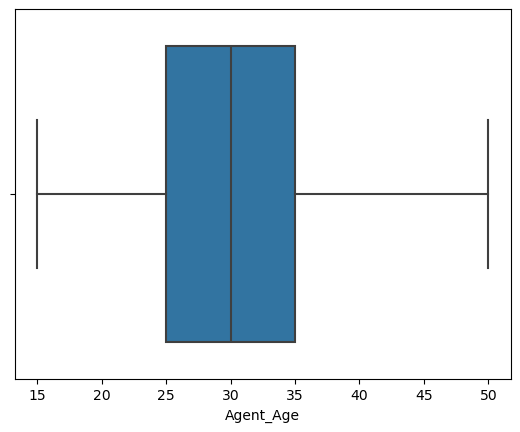

In [13]:
sns.boxplot(x=df["Agent_Age"])
# there are no outliers in agent_age

<Axes: xlabel='Weather', ylabel='count'>

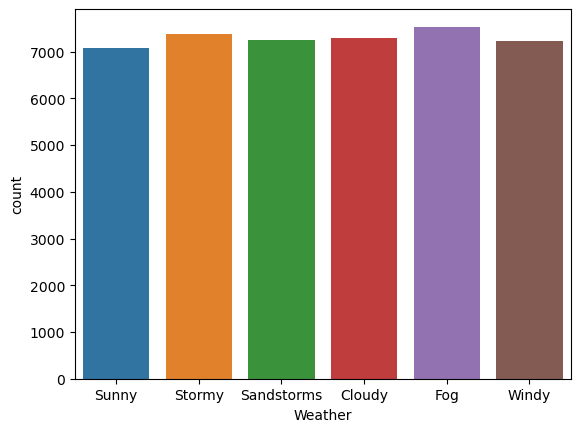

In [14]:
sns.countplot(x=df["Weather"])

In [15]:
df["Traffic"].value_counts()
a=df['Traffic'].mode()[0]
df['Traffic'].replace('NaN ',a,inplace=True)

<Axes: xlabel='Traffic', ylabel='count'>

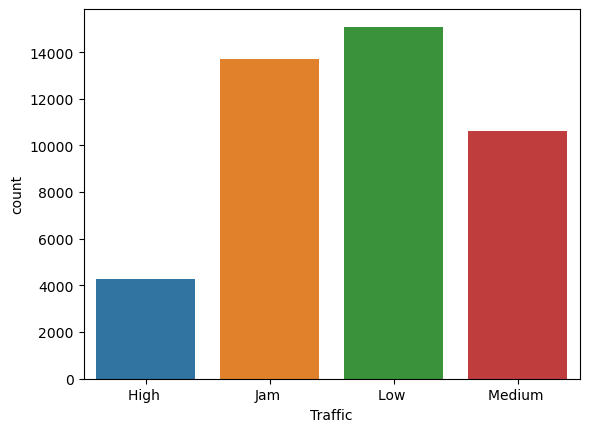

In [16]:
sns.countplot(x=df["Traffic"])
# from this we can infer that highest deliveries completed by agent are during the low traffic conditions

In [17]:
df.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Agent_rating_capping,Agent_rating_mean_imputation,Agent_rating_mean_addsub
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,4.9,4.9,4.9
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5


<Axes: xlabel='Vehicle', ylabel='count'>

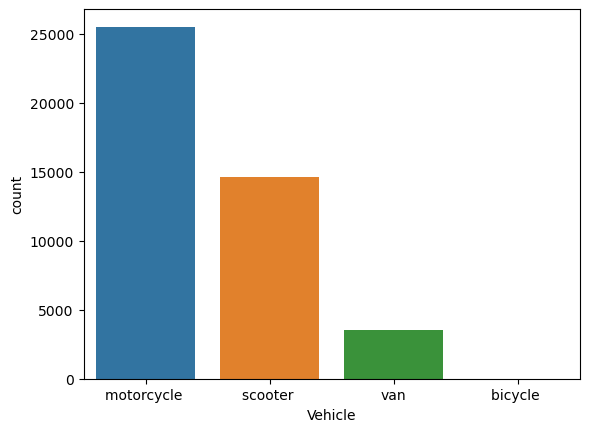

In [18]:
sns.countplot(x=df["Vehicle"])
# Based on the data most of the delivery agents using the motorcyle for deliveries

<Axes: xlabel='Area', ylabel='count'>

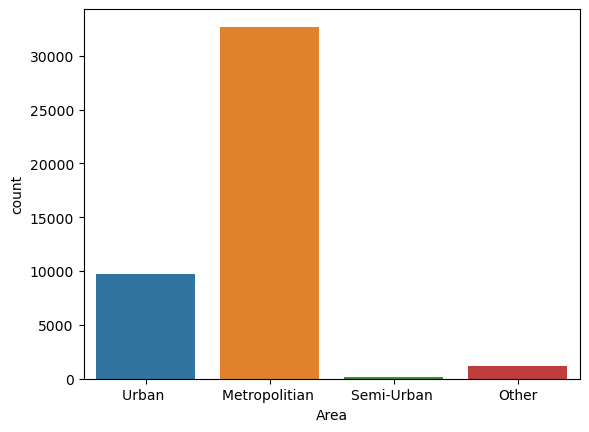

In [19]:
sns.countplot(x=df["Area"])
# From the analysis metropolitan has registerd more number of deliveries

<Axes: xlabel='Delivery_Time'>

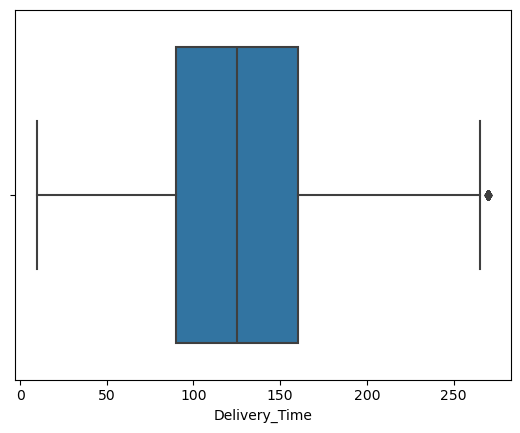

In [20]:
sns.boxplot(x=df["Delivery_Time"])

In [21]:
q3=df["Delivery_Time"].quantile(0.75)
q1=df["Delivery_Time"].quantile(0.25)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr

df["Delivery_Time_clean"]=df["Delivery_Time"].apply(lambda x:ll if x<ll else ul if x>ul else x)
#df["Delivery_Time_clean"].plot(kind="box")

<Axes: xlabel='count', ylabel='Category'>

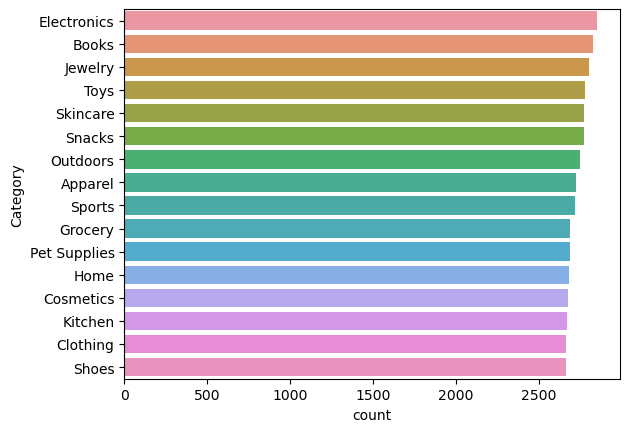

In [22]:
sns.countplot(y=df["Category"],order=df["Category"].value_counts().index)
# From the wide variety of categories electronics are the highest delivered goods

In [23]:
# the top five categories are electronics,books,jewellery and toys 
df.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Agent_rating_capping,Agent_rating_mean_imputation,Agent_rating_mean_addsub,Delivery_Time_clean
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,4.9,4.9,4.9,120.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5,165.0


<Axes: xlabel='Agent_Age', ylabel='Agent_Rating'>

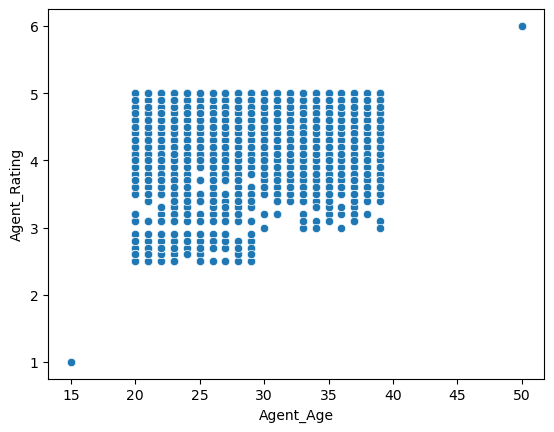

In [24]:
sns.scatterplot(x=df["Agent_Age"],y=df["Agent_Rating"])
# We can infer that most of the drivers belong to the age group between 20 and 40
# only one is 15 years old and the other is 50 year old

In [25]:
# the highest rating given by the customer to the delivery agent who is 50 years old 
# so by looking at this data we can infer that the employee could be experienced
# Agent with 15 year old is identified which is against regulatory voilation

df[["Agent_Rating","Agent_rating_mean_imputation","Agent_rating_mean_addsub","Agent_rating_capping"]].skew()

Agent_Rating                   -2.495635
Agent_rating_mean_imputation   -0.951017
Agent_rating_mean_addsub        4.013221
Agent_rating_capping           -0.984833
dtype: float64

In [26]:
df[["Agent_Rating","Agent_rating_mean_imputation","Agent_rating_mean_addsub","Agent_rating_capping"]].kurt()

Agent_Rating                    15.694417
Agent_rating_mean_imputation     0.489381
Agent_rating_mean_addsub        22.466079
Agent_rating_capping             0.491194
dtype: float64

<Axes: xlabel='Agent_Age', ylabel='Delivery_Time_clean'>

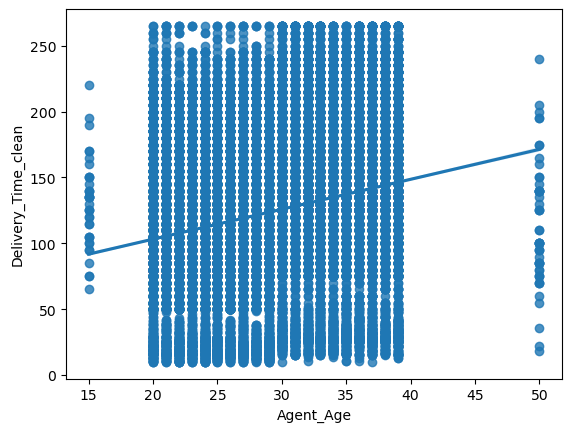

In [27]:
sns.regplot(x=df["Agent_Age"],y=df["Delivery_Time_clean"])

In [28]:
# as agent age is incresing deliverytime is increasing slightly


<Axes: xlabel='Agent_rating_capping', ylabel='Delivery_Time_clean'>

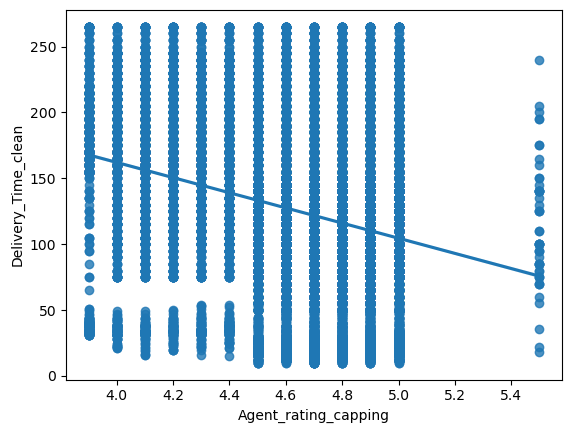

In [29]:
sns.regplot(x=df["Agent_rating_capping"],y=df["Delivery_Time_clean"])

In [30]:
# wFrom the above insights we can infer that rating increases as delivery time decreses
# the highest delivery rating is 6 with a  delivery time period of 50-55 minutes 

<Axes: xlabel='Weather', ylabel='Delivery_Time_clean'>

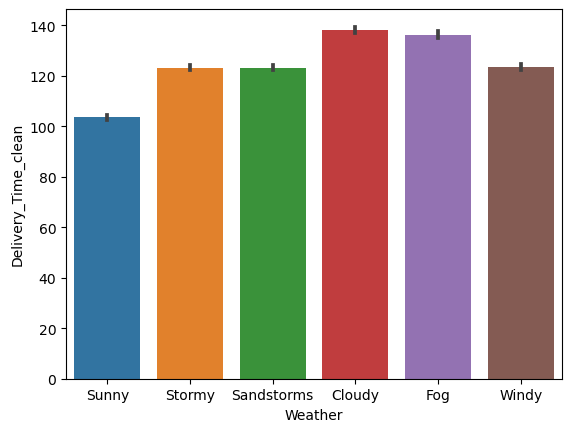

In [31]:
sns.barplot(x=df["Weather"],y=df["Delivery_Time_clean"])

In [32]:
# the longest duration of the delivery is on cloudy day and lowest delivery duration is on sunny day 

<Axes: xlabel='Vehicle', ylabel='Delivery_Time_clean'>

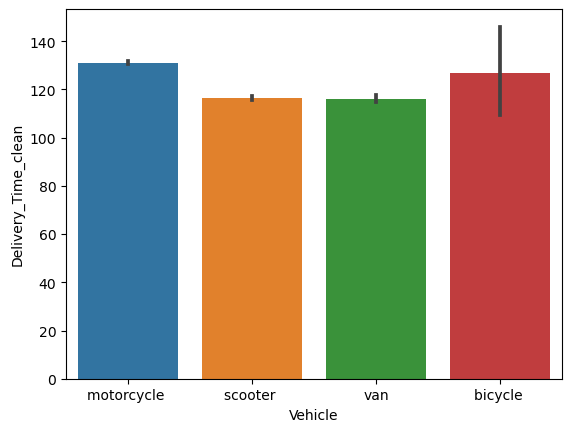

In [33]:
sns.barplot(x=df["Vehicle"],y=df["Delivery_Time_clean"])
# From the data motorcycle delivery duration is longer than all the other means of transport
# By this we can also infer that bycycle range of delivery radius may be less 

<Axes: xlabel='Area', ylabel='Delivery_Time_clean'>

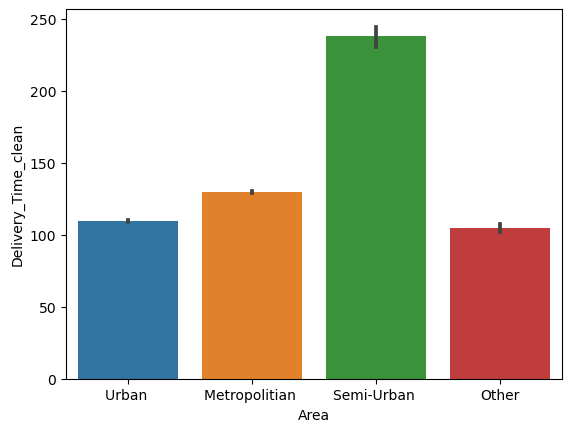

In [34]:
sns.barplot(x=df["Area"],y=df["Delivery_Time_clean"])
# From this we can infer that semi urban delivery time is so long compared to urban and metropolitan
# we can say that semi urban contains less number of drivers so it took longer duration

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Cosmetics'),
  Text(4, 0, 'Toys'),
  Text(5, 0, 'Snacks'),
  Text(6, 0, 'Shoes'),
  Text(7, 0, 'Apparel'),
  Text(8, 0, 'Jewelry'),
  Text(9, 0, 'Outdoors'),
  Text(10, 0, 'Grocery'),
  Text(11, 0, 'Books'),
  Text(12, 0, 'Kitchen'),
  Text(13, 0, 'Home'),
  Text(14, 0, 'Pet Supplies'),
  Text(15, 0, 'Skincare')])

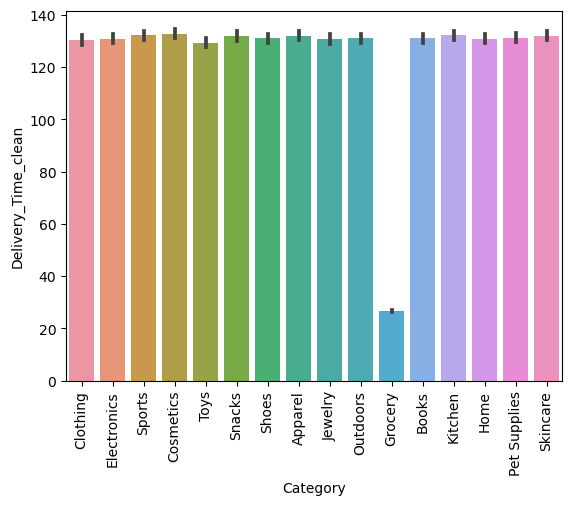

In [35]:
sns.barplot(x=df["Category"],y=df["Delivery_Time_clean"])
plt.xticks(rotation=90)
# grocery delivery is faster than all other categories 
# the transport of goods from other categories took some time for transportation from manufacturer

<Axes: xlabel='Weather', ylabel='count'>

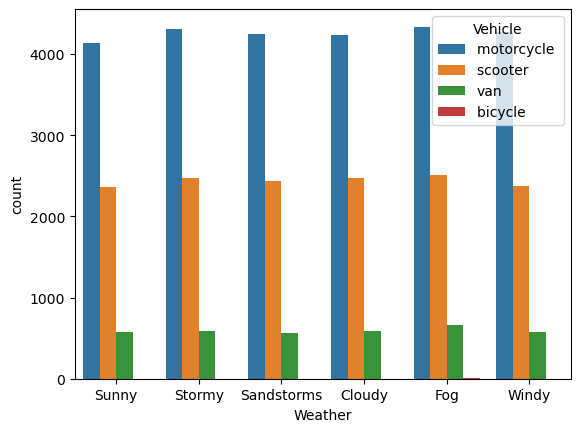

In [36]:
sns.countplot(x=df["Weather"],hue=df["Vehicle"])
#We can infer that on the sunny day the deliveries on motorcycle are less compared to other weather conditions

In [37]:
df.head(3)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Agent_rating_capping,Agent_rating_mean_imputation,Agent_rating_mean_addsub,Delivery_Time_clean
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,4.9,4.9,4.9,120.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5,165.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,4.4,4.4,4.4,130.0


<Axes: xlabel='Agent_Rating', ylabel='Delivery_Time_clean'>

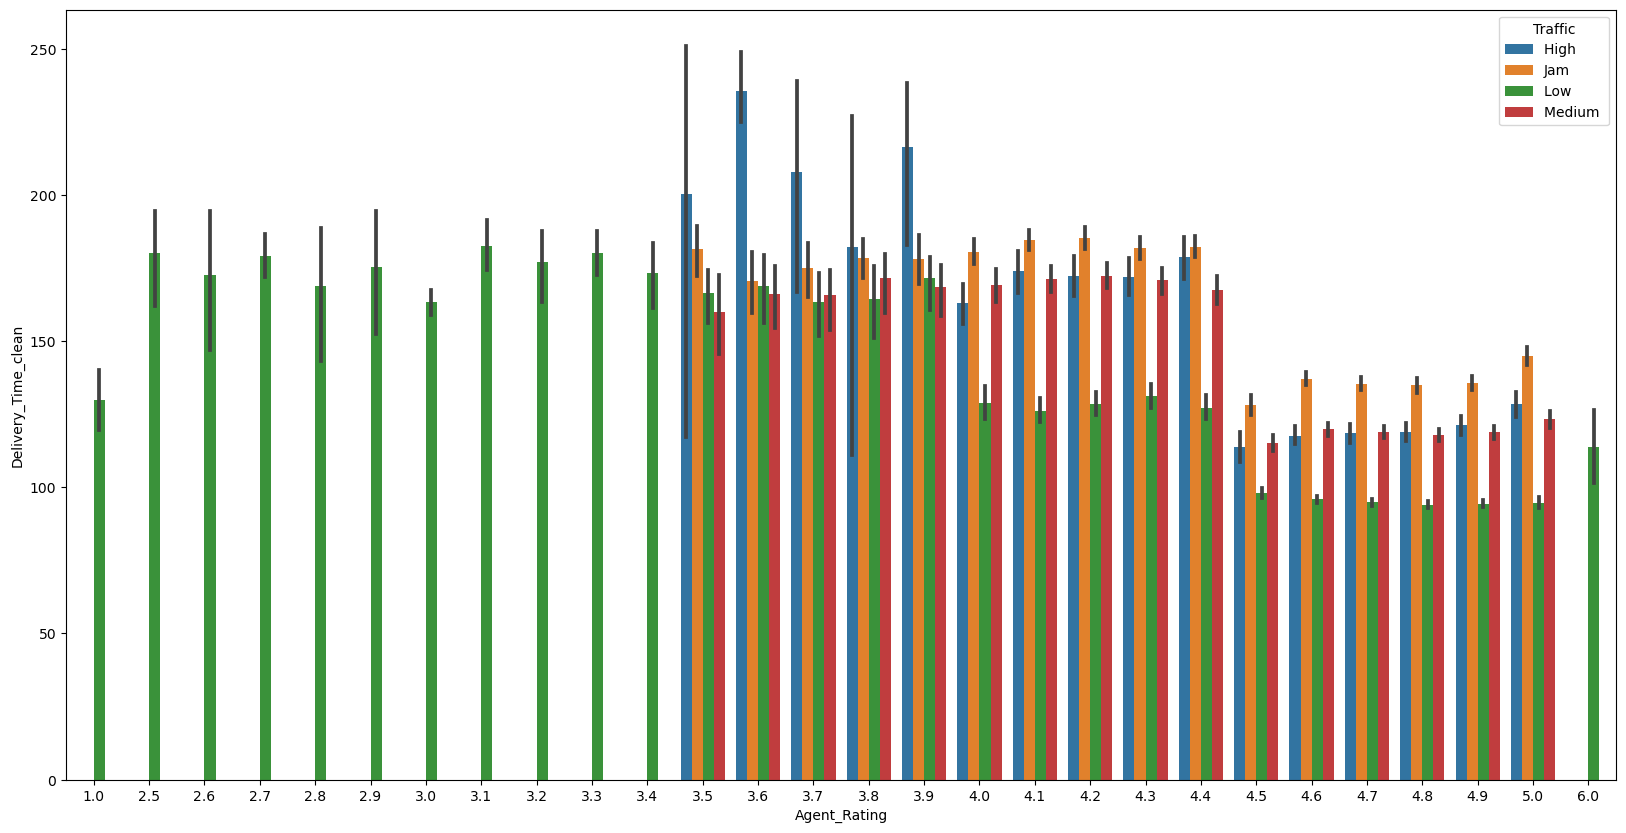

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x=df["Agent_Rating"],y=df["Delivery_Time_clean"],hue=df["Traffic"])

<Axes: xlabel='Agent_Rating', ylabel='Delivery_Time_clean'>

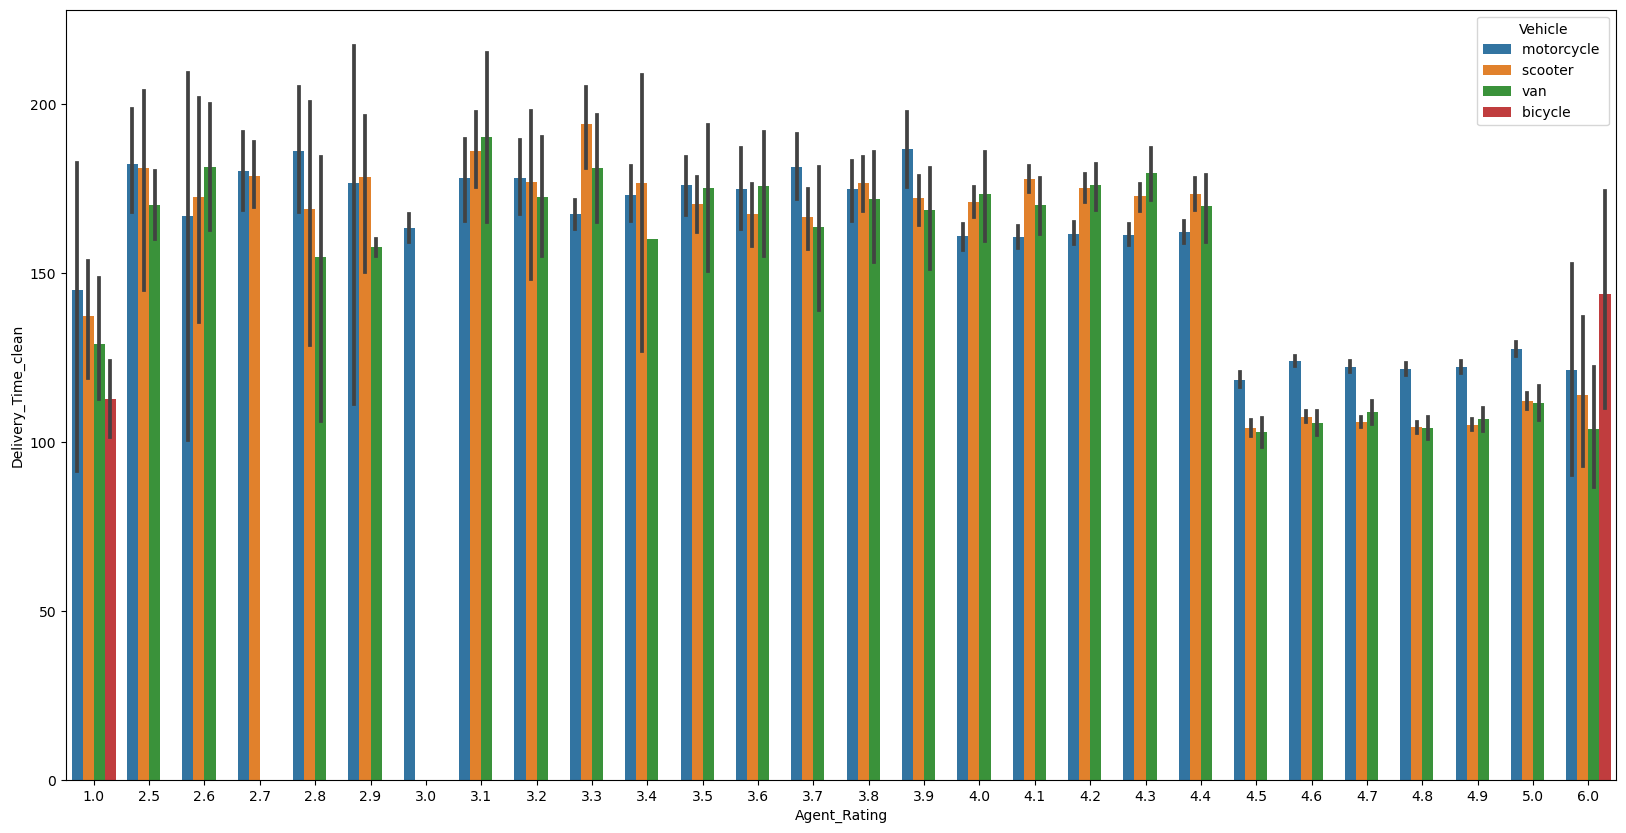

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x=df["Agent_Rating"],y=df["Delivery_Time_clean"],hue=df["Vehicle"])

In [40]:
#here the rating 1 is given for bicycle with lowest delivery time

In [41]:
#Which month got highest number of orders during the particular year?(seasonal trends)
df.head(3)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Agent_rating_capping,Agent_rating_mean_imputation,Agent_rating_mean_addsub,Delivery_Time_clean
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,4.9,4.9,4.9,120.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5,165.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,4.4,4.4,4.4,130.0


In [42]:
def rem(x):
    a=x.split("-")
    return a[2]
df["order_day"]=df["Order_Date"].apply(rem)

In [43]:
def sem(x):
    a=x.split("-")
    return a[1]
df["order_month"]=df["Order_Date"].apply(sem)

In [44]:
#Which month got highest number of orders during the particular year
pd.pivot_table(df,index=["Category"],columns=["order_month"],values="Order_ID",aggfunc="count")


order_month,02,03,04
Category,,,
Apparel,450,1908,368
Books,449,1971,404
Clothing,400,1903,364
Cosmetics,458,1862,357
Electronics,413,2030,406
Grocery,400,1921,370
Home,420,1894,371
Jewelry,430,1962,410
Kitchen,450,1815,408


<Axes: xlabel='Category'>

<Figure size 2000x600 with 0 Axes>

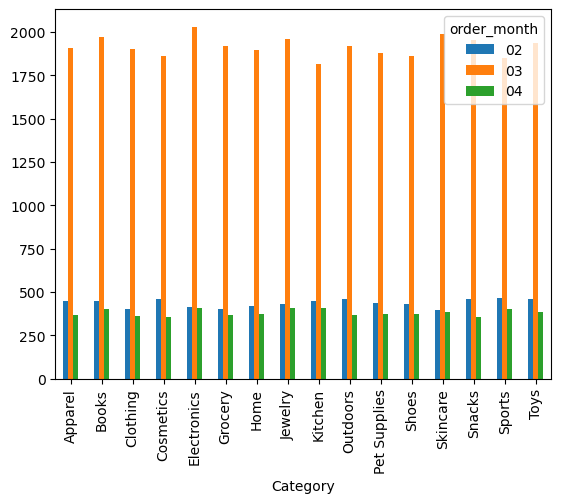

In [45]:
plt.figure(figsize=(20,6))
pd.pivot_table(df,index=["Category"],columns=["order_month"],values="Order_ID",aggfunc="count").plot(kind="bar")

In [46]:
#Which day got highest number of orders during the particular year
x=pd.pivot_table(df,index=["Category"],columns=["order_day"],values="Order_ID",aggfunc="count").head(5)
x

order_day,01,02,03,04,05,06,07,08,09,10,...,21,23,24,25,26,27,28,29,30,31
Category,,,,,,,,,,,,,,,,,,,,,
Apparel,128,111,160,111,124,114,74,59,59,52,...,73,53,53,76,63,51,68,76,71,57
Books,138,149,172,116,136,108,61,72,65,53,...,63,68,72,54,80,59,55,58,67,61
Clothing,126,115,151,130,123,109,62,48,76,79,...,72,55,67,51,71,62,72,61,70,43
Cosmetics,132,110,123,134,136,113,34,79,58,59,...,64,47,76,62,71,61,65,57,66,57
Electronics,147,115,147,105,159,127,75,47,79,67,...,83,72,87,62,54,61,77,53,81,64


In [47]:
df.groupby("order_month")["Order_ID"].count()

order_month
02     6982
03    30658
04     6099
Name: Order_ID, dtype: int64

<Axes: xlabel='order_month'>

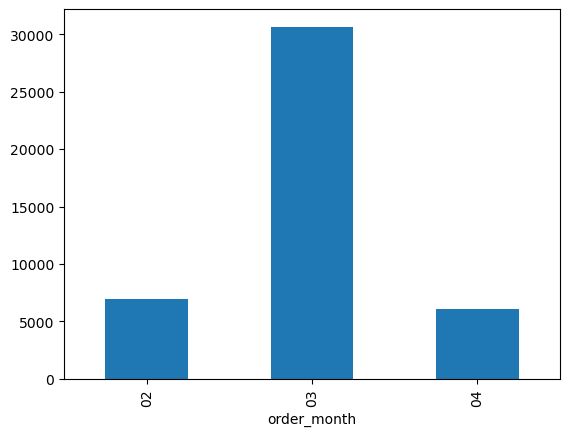

In [48]:
df.groupby("order_month")["Order_ID"].count().plot(kind="bar")

In [49]:
df.groupby("order_day")["Order_ID"].count()

order_day
01    2168
02    1914
03    2252
04    1849
05    2218
06    1867
07    1093
08     919
09    1117
10     947
11    2034
12    1768
13    2047
14    1757
15    2045
16    1782
17    1990
18    1751
19    1103
20     945
21    1107
23     922
24    1112
25     931
26    1119
27     932
28    1092
29     938
30    1091
31     929
Name: Order_ID, dtype: int64

<Axes: xlabel='order_month'>

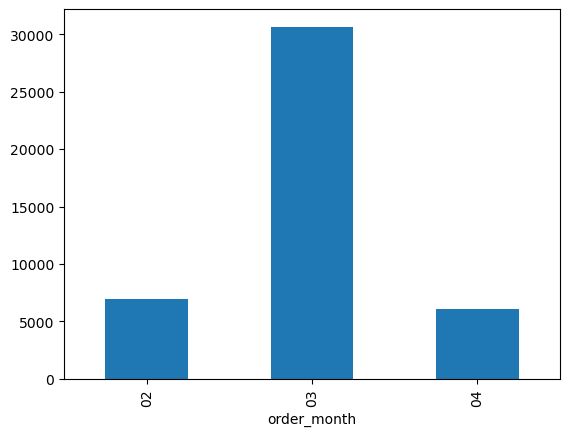

In [50]:
df.groupby("order_month")["Order_ID"].count().plot(kind="bar")
# Based on the data we can infer that in the month of march highest orders are recorded 
# We can assume that's because of the tax returns or a huge sale

<Axes: >

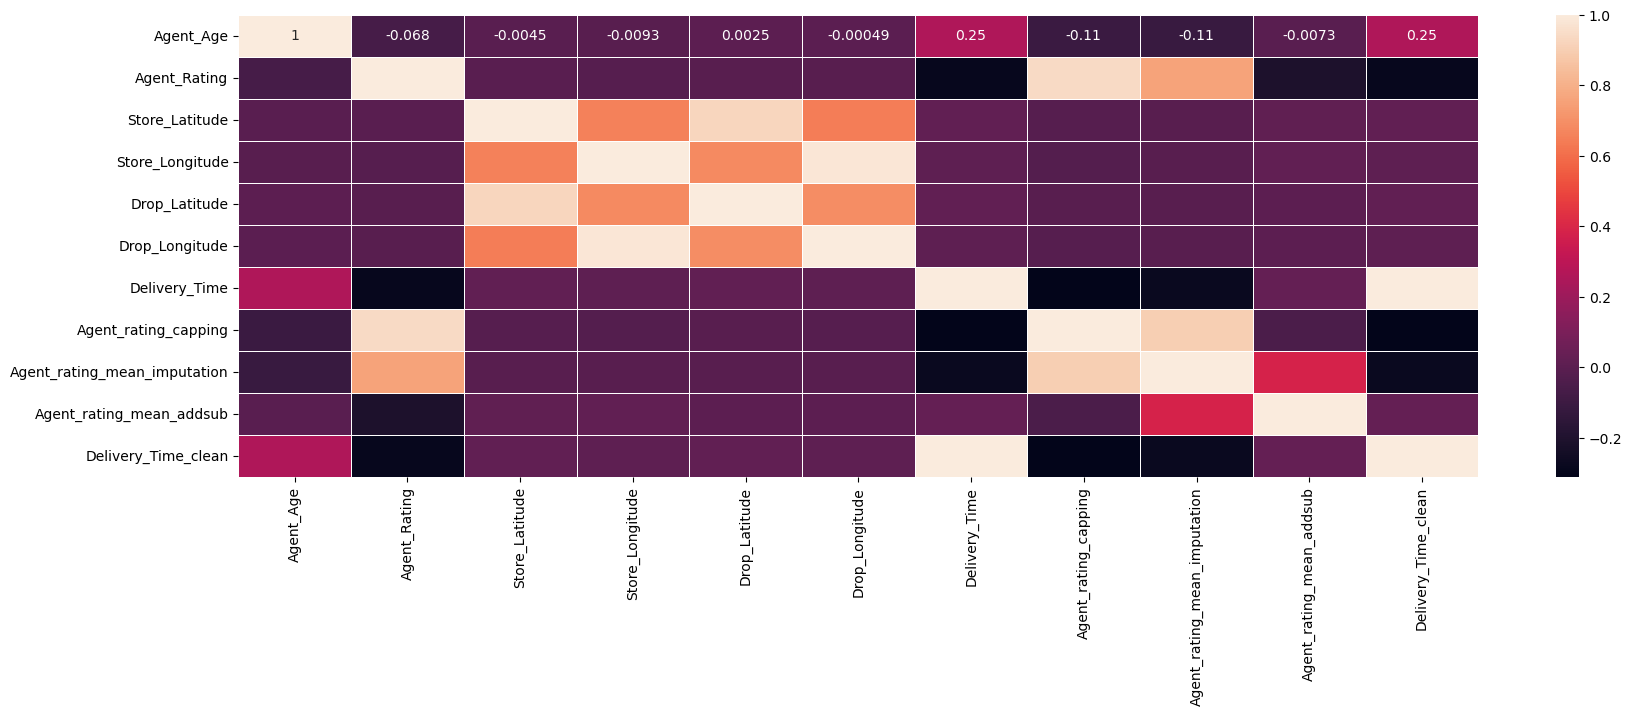

In [51]:
# finding the corelation between numericall columns
plt.figure(figsize=(20,6))
sns.heatmap(df.select_dtypes(np.number).corr(),annot=True,linewidth=0.5)
# there is no strong relation between variables

In [52]:
df.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Vehicle,Area,Delivery_Time,Category,Agent_rating_capping,Agent_rating_mean_imputation,Agent_rating_mean_addsub,Delivery_Time_clean,order_day,order_month
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,motorcycle,Urban,120,Clothing,4.9,4.9,4.9,120.0,19,03
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5,165.0,25,03


<Axes: xlabel='Traffic'>

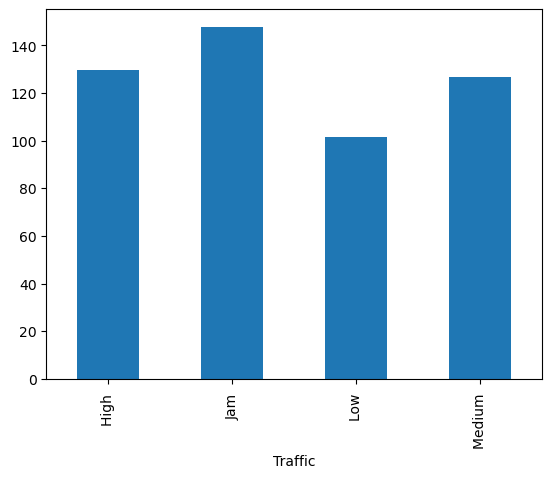

In [53]:
df.groupby("Traffic")["Delivery_Time_clean"].mean().plot(kind="bar")
# the average delivery time during the traffic jam is high 

In [54]:
df.groupby("Delivery_Time_clean")["Category"].value_counts()

Delivery_Time_clean  Category   
10.0                 Grocery        32
11.0                 Grocery        48
12.0                 Grocery        44
13.0                 Grocery        42
14.0                 Grocery        49
                                    ..
265.0                Clothing        9
                     Sports          8
                     Shoes           8
                     Electronics     7
                     Books           5
Name: count, Length: 705, dtype: int64

In [55]:
z=df.groupby(["Area","Vehicle"])["Delivery_Time_clean"].min().reset_index()#.plot(kind="bar")

<Axes: xlabel='Area', ylabel='Delivery_Time_clean'>

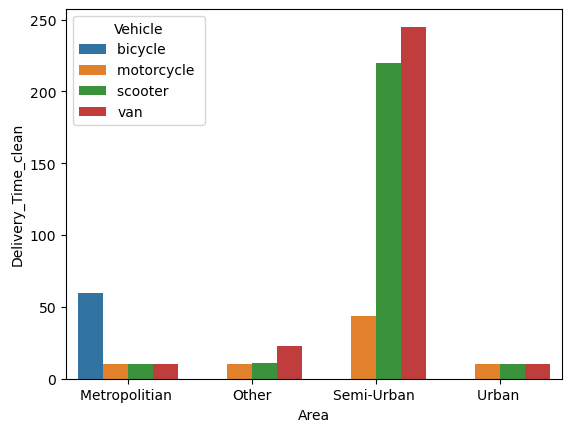

In [56]:
sns.barplot(x=z["Area"],y=z["Delivery_Time_clean"],hue=z["Vehicle"])
#Apart from  bicycle in metropolitan, Van,scooter and motorcycle have the fastest delivery recorded as in urban area
#where as in semi urban & other  areas motorcycle is the fastest means of transportation  

<Axes: xlabel='Vehicle', ylabel='Delivery_Time_clean'>

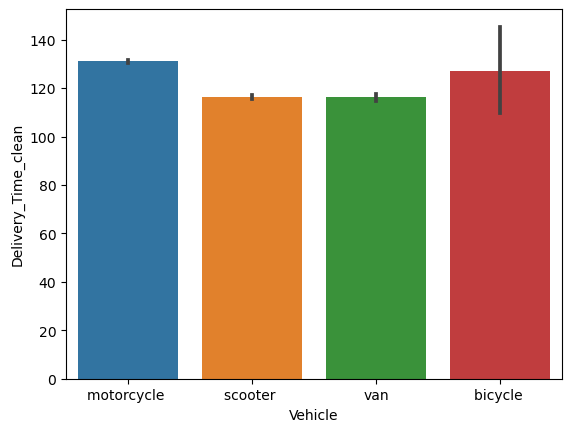

In [57]:
sns.barplot(x=df["Vehicle"],y=df["Delivery_Time_clean"])
# Despite the van size being large the delivery duration is very less compared to all other means of transportation

In [58]:
df.groupby("Area")["Order_ID"].count()

Area
Metropolitian     32698
Other              1138
Semi-Urban          152
Urban              9751
Name: Order_ID, dtype: int64

In [59]:
df["Area"].value_counts()

Area
Metropolitian     32698
Urban              9751
Other              1138
Semi-Urban          152
Name: count, dtype: int64

In [60]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [61]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Vehicle,Area,Delivery_Time,Category,Agent_rating_capping,Agent_rating_mean_imputation,Agent_rating_mean_addsub,Delivery_Time_clean,order_day,order_month
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,motorcycle,Urban,120,Clothing,4.9,4.9,4.9,120.0,19,03
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5,165.0,25,03
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,motorcycle,Urban,130,Sports,4.4,4.4,4.4,130.0,19,03
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,motorcycle,Metropolitian,105,Cosmetics,4.7,4.7,4.7,105.0,05,04
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,scooter,Metropolitian,150,Toys,4.6,4.6,4.6,150.0,26,03


In [62]:
# whether all the weather conditions have same average delivery time

In [63]:
# H0:weather conditions have same average delivery time
# HA: Atleast one mean is not equal 
df["Weather"].unique()


array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy'],
      dtype=object)

In [64]:
a=df[df["Weather"]=='Sunny']["Delivery_Time_clean"]
b=df[df["Weather"]=='Stormy']["Delivery_Time_clean"]
c=df[df["Weather"]=='Sandstorms']["Delivery_Time_clean"]
d=df[df["Weather"]=='Cloudy']["Delivery_Time_clean"]
e=df[df["Weather"]=='Fog']["Delivery_Time_clean"]
f=df[df["Weather"]=='Windy']["Delivery_Time_clean"]
# to check wheteher the data is normal or not we pass through shapiro test 
# H0:Data is normal(skew=0)
# HA:Data is not normal(skew<>0)
print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.shapiro(c))
print(stats.shapiro(d))
print(stats.shapiro(e))
print(stats.shapiro(f))



ShapiroResult(statistic=0.9571000337600708, pvalue=2.1818217089537402e-41)
ShapiroResult(statistic=0.9920197129249573, pvalue=5.903449091297444e-20)
ShapiroResult(statistic=0.9918498396873474, pvalue=5.374646096624218e-20)
ShapiroResult(statistic=0.987855851650238, pvalue=1.5789564763663076e-24)
ShapiroResult(statistic=0.9861910939216614, pvalue=1.8092532564963683e-26)
ShapiroResult(statistic=0.991972804069519, pvalue=8.36112289087525e-20)


In [65]:
# Here the p value <0.05
# rejct H0
# data is  not normal
# we cannot proceed further 

In [66]:
# ordinal encoding
df["Area"].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'Other'], dtype=object)

In [67]:
oe=OrdinalEncoder(categories=[["Metropolitian ","Urban ","Semi-Urban ","Other"]])
df["Area_oe"]=oe.fit_transform(df[["Area"]])
pd.crosstab(df["Area"],df["Area_oe"])

Area_oe,0.0,1.0,2.0,3.0
Area,,,,
Metropolitian,32698,0,0,0
Other,0,0,0,1138
Semi-Urban,0,0,152,0
Urban,0,9751,0,0


In [68]:
#ordinal encoding
df["Traffic"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object)

In [69]:
oe=OrdinalEncoder(categories=[['Low ', 'Medium ', 'High ', 'Jam ']])
df["Traffic_oe"]=oe.fit_transform(df[["Traffic"]])
pd.crosstab(df["Traffic_oe"],df["Traffic"])

Traffic,High,Jam,Low,Medium
Traffic_oe,,,,
0.0,0,0,15090,0
1.0,0,0,0,10628
2.0,4296,0,0,0
3.0,0,13725,0,0


In [70]:
# label encoding
df["Vehicle"].unique()

array(['motorcycle ', 'scooter ', 'van', 'bicycle '], dtype=object)

In [71]:
le=LabelEncoder()
df["Vehicle_le"]=le.fit_transform(df["Vehicle"])
pd.crosstab(df["Vehicle"],df["Vehicle_le"])

Vehicle_le,0,1,2,3
Vehicle,,,,
bicycle,15,0,0,0
motorcycle,0,25527,0,0
scooter,0,0,14639,0
van,0,0,0,3558


In [72]:
#Frequency Encoding
df["Category"].unique()
df["Category"].value_counts()
#here no two frequency counts are same so we can go for frequency encoding

Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name: count, dtype: int64

In [73]:
df["Category_fe"]=df["Category"].map(df["Category"].value_counts()/df.shape[0]*100)


In [74]:
df.head(3) # here the new column category_fe states the %frequency of the category column that repeated 

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Agent_rating_capping,Agent_rating_mean_imputation,Agent_rating_mean_addsub,Delivery_Time_clean,order_day,order_month,Area_oe,Traffic_oe,Vehicle_le,Category_fe
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,4.9,4.9,4.9,120.0,19,03,1.0,2.0,1,6.097533
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,4.5,4.5,4.5,165.0,25,03,0.0,3.0,2,6.513638
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,4.4,4.4,4.4,130.0,19,03,1.0,0.0,1,6.216420


In [75]:
#Target encoding for weather and delivery time 
df["Weather_te"]=df["Weather"].map(df.groupby("Weather")["Delivery_Time_clean"].mean())


In [76]:
df.head(2) # here the new column weather_fe shows that on the weather the average delivery time 

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Agent_rating_mean_imputation,Agent_rating_mean_addsub,Delivery_Time_clean,order_day,order_month,Area_oe,Traffic_oe,Vehicle_le,Category_fe,Weather_te
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,4.9,4.9,120.0,19,03,1.0,2.0,1,6.097533,103.655270
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,4.5,4.5,165.0,25,03,0.0,3.0,2,6.513638,123.203011


In [77]:
# Dummy encoding
d=pd.get_dummies(df["Weather"],drop_first=True).replace({True:1,False:0})
d

,Fog,Sandstorms,Stormy,Sunny,Windy
0,0,0,0,1,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,0,0
...,...,...,...,...,...
43734,0,0,0,0,1
43735,0,0,0,0,1
43736,0,0,0,0,0
43737,0,0,0,0,0


In [78]:
#df=pd.concat([df,d],axis=1)
df.head(2) #here categorical variables are added to the data frame and encoded as well

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Agent_rating_mean_imputation,Agent_rating_mean_addsub,Delivery_Time_clean,order_day,order_month,Area_oe,Traffic_oe,Vehicle_le,Category_fe,Weather_te
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,4.9,4.9,120.0,19,03,1.0,2.0,1,6.097533,103.655270
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,4.5,4.5,165.0,25,03,0.0,3.0,2,6.513638,123.203011


# Feature scaling

In [79]:
ss=StandardScaler()
df["Age_ss"]=ss.fit_transform(df[["Agent_Age"]])
df[["Agent_Age","Age_ss"]].mean()

Agent_Age    2.956714e+01
Age_ss      -1.367834e-16
dtype: float64

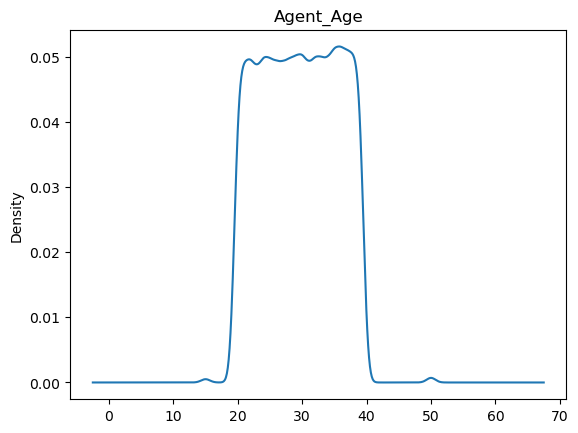

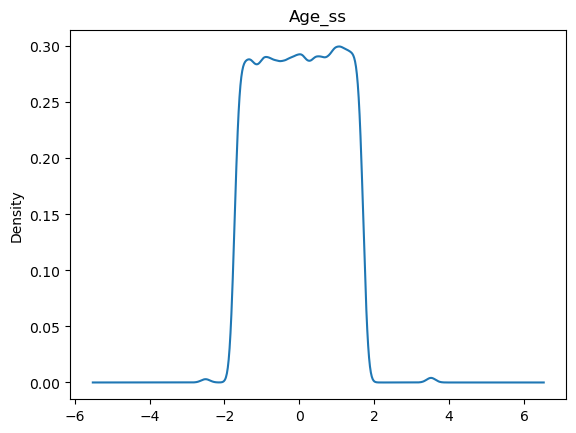

In [80]:
for i in df[["Agent_Age","Age_ss"]]:
    df[i].plot(kind="kde")
    plt.title(i)
    plt.show()

In [81]:
ss=StandardScaler()
df["Delivery_Time_clean_ss"]=ss.fit_transform(df[["Delivery_Time_clean"]])
df[["Delivery_Time_clean","Delivery_Time_clean_ss"]].mean()

Delivery_Time_clean       1.248966e+02
Delivery_Time_clean_ss   -1.221629e-16
dtype: float64

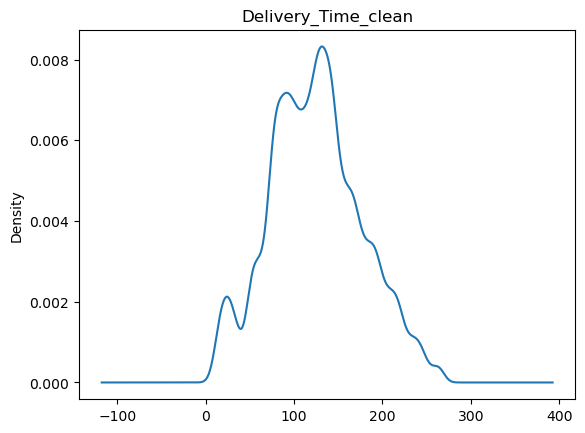

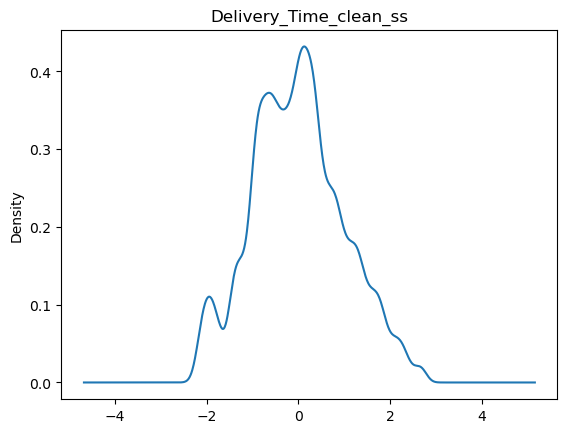

In [82]:
for i in df[["Delivery_Time_clean","Delivery_Time_clean_ss"]]:
    df[i].plot(kind="kde")
    plt.title(i)
    plt.show()